In [197]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
df = pd.read_csv('cleaned_house_sales.csv')

# Converting date [sold] to year sold

df['yr_sold'] = pd.to_datetime(df['date']).dt.year
df = df.drop(columns=['date'])

# List of numerical variables

numerical = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
             'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold']

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,7129300520,"221,900.00",3.00,1.00,"1,180.00","5,650.00",1.00,0,0,3,...,1180,0,1955,NaN,98178,47.51,-122.26,1340,5650,2014
1,6414100192,"538,000.00",3.00,2.25,"2,570.00","7,242.00",2.00,0,0,3,...,2170,400,1951,"1,991.00",98125,47.72,-122.32,1690,7639,2014
2,5631500400,"180,000.00",2.00,1.00,770.00,"10,000.00",1.00,0,0,3,...,770,0,1933,NaN,98028,47.74,-122.23,2720,8062,2015
3,2487200875,"604,000.00",4.00,3.00,"1,960.00","5,000.00",1.00,0,0,5,...,1050,910,1965,NaN,98136,47.52,-122.39,1360,5000,2014
4,1954400510,"510,000.00",3.00,2.00,"1,680.00","8,080.00",1.00,0,0,3,...,1680,0,1987,NaN,98074,47.62,-122.05,1800,7503,2015


**Identify categorical, ordinal, and numerical variables within the data:**

Within the dataset, variables were classified according to their respective data types to assist in exploratory analysis and modelling.

- Categorical variables: zipcode
- Ordinal variables: waterfront, view, condition, grade
- Numerical variables: price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15, yr_sold

Categorical variables include zipcode, which functions as an identifier as opposed to a true numerical variable.  Waterfront, view, condition, and grade, were marked as ordinal variables because they either use a binary field indicating the presence or absence of the listed attributes, or represent an ordered measure of quality. The remaining variables were categorized as numerical since they consist of measurable values that will be useful in the model. date, originally a categorical variable, was converted into the numerical variable yr_sold to be more effectively incorporated into the analysis.

**Provide measures of centrality and distribution with visualizations:**

In [199]:
# Show statistical measures 

descriptivestats = df[numerical].describe()

# Including range
range = df[numerical].max() - df[numerical].min()
descriptivestats.loc['range'] = range

# Including mode
mode = df[numerical].mode().iloc[0]
descriptivestats.loc['mode'] = mode

# Including variance
variance = df[numerical].var()
descriptivestats.loc['variance'] = variance

round(descriptivestats, 3).T

,count,mean,std,min,25%,50%,75%,max,range,mode,variance
price,"21,359.00","537,791.63","360,775.91","75,000.00","320,000.00","450,000.00","640,000.00","6,885,000.00","6,810,000.00","450,000.00","130,159,259,203.99"
bedrooms,"21,359.00",3.35,0.88,1.00,3.00,3.00,4.00,10.00,9.00,3.00,0.78
bathrooms,"21,359.00",2.12,0.74,0.50,1.75,2.25,2.50,7.75,7.25,2.50,0.55
sqft_living,"21,359.00","2,063.47",878.58,290.00,"1,450.00","1,920.00","2,500.00","9,640.00","9,350.00","1,920.00","771,899.69"
sqft_lot,"21,359.00","11,403.06","16,772.46",520.00,"5,108.00","7,620.00","10,223.50","199,940.00","199,420.00","7,620.00","281,315,525.75"
floors,"21,359.00",1.49,0.54,1.00,1.00,1.50,2.00,3.50,2.50,1.00,0.29
sqft_above,"21,359.00","1,778.47",815.51,290.00,"1,190.00","1,560.00","2,200.00","8,860.00","8,570.00","1,300.00","665,062.11"
sqft_basement,"21,359.00",291.08,439.75,0.00,0.00,0.00,560.00,"4,820.00","4,820.00",0.00,"193,377.40"
yr_built,"21,359.00","1,970.86",29.42,"1,900.00","1,951.00","1,974.00","1,997.00","2,015.00",115.00,"2,014.00",865.32
yr_renovated,899.00,"1,995.87",15.58,"1,934.00","1,987.00","2,000.00","2,007.00","2,015.00",81.00,"2,014.00",242.63


Measures of central tendency and distribution were determined by applying the describe() function to the 'numerical' list, which provided the mean, median/quartiles, minimum/maximum, and standard deviation. Mode, range, and variance were also calculated separately and added to the table. From these results alone, significant variation among house sale prices (price). Similarly, sqft_living, sqft_lot, and sqft_above also present high standard deviations and large ranges, suggesting substantial spread in housing size. 

The house sale prices mean of 537,791.634 USD is higher than the median of 450,000 USD, indicating a positive/right skew in distribution. These observations are further supported by the histogram and boxplot below. From the histogram, there appears to be a strong right skew, with significant majority of houses falling between roughly 250,000 USD to 750,000 USD, but the tail stretches well beyond these values. The boxplot follows a similar pattern with a comparatively small interquartile range (IQR), a longer upper whisker, and several higher priced outliers. Although outliers were removed based on house size, variations in price continue to exist. Both plots suggest that the distribution of house prices is generally concentrated to a specific range, but there are higher value properties creating a skew. 

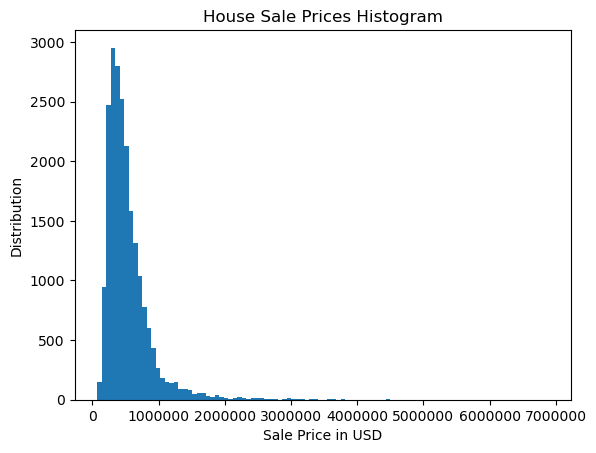

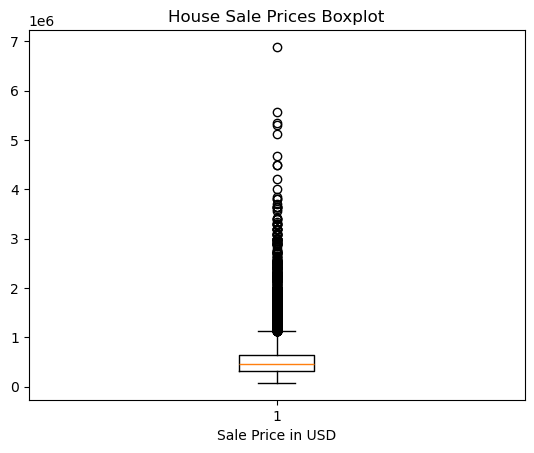

In [200]:
# House Sale Prices Histogram

plt.hist(df['price'], bins=100)
plt.title("House Sale Prices Histogram")
plt.xlabel("Sale Price in USD")
plt.ylabel("Distribution")
plt.ticklabel_format(style='plain') 
plt.show()

# House Sale Prices Boxplot

plt.boxplot(df['price'])
plt.title("House Sale Prices Boxplot")
plt.xlabel("Sale Price in USD")
plt.show()

**Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables**

The dataset presents a clear goal of predicting house sale price, and therefore facilitates the need for a supervised learning method. Supervised learning is ideal in this scenario because the true output (house sale price) is provided and can be compared against the model's predictions to determine its effectiveness. Sale price (price) then, serves as the dependent or target variable. The model's independent variables are made up of the remaining attributes that involve the property's structure and location. 

From the correlation matrix, multiple variables posed a risk of multicollinearity. In particular, sqft_living and sqft_above, sqft_living and sqft_living15, as well as sqft_lot and sqft_lot15 demonstrated strong positive correlation (r = 0.849603, r = 0.742807, and r = 0.716402, respectively). To improve reliability, sqft_above, sqft_living15, and sqft_lot15 were omitted in the final model. The variable zipcode, a categorical variable, was also removed as the effect of location is already accounted for with latitude and longitude. 

Independent & Dependent Variables:
- Dependent variable: price
- Independent variables: bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, yr_sold

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

# Removing ID and converting NaN to 0

df = df.drop(columns=['id'])
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Dependent & independent variables

y = df['price']
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
     'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'yr_sold']]

# Splitting for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=222)

# Count # of rows of train and test sets

trainshape = X_train.shape[0]
testshape = X_test.shape[0]

# Train/test percentages

trainpercent = trainshape / (trainshape + testshape)
testpercent = testshape / (trainshape + testshape)
print("Train size:", trainpercent)
print("Test size:", testpercent)

Train size: 0.7499882953321785
Test size: 0.2500117046678215


In [207]:
# Multiple regression model

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_results = sm.OLS(y_train, X_train).fit()
X_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1961.
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        01:12:23   Log-Likelihood:            -2.1929e+05
No. Observations:               16019   AIC:                         4.386e+05
Df Residuals:                   16004   BIC:                         4.387e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.953e+07   7.54e+06    -13.207      0.000   -1.14e+08   -8.48e+07
bedrooms      -3.409e+04   2398.994    -14.210      0.000   -3.88e+04   -2.94e+04
bathrooms       6.74e+04   3834.418     17.578      0.000    5.99e+04    7.49e+04
sqft_living     254.2861      3.318     76.645      0.000     247.783     260.789
sqft_lot         -0.1527      0.111     -1.381      0.167      -0.369       0.064
floors         2.407e+04   4353.380      5.529      0.000    1.55e+04    3.26e+04
waterfront      4.61e+05   2.25e+04     20.462      0.000    4.17e+05    5.05e+05
view           7.512e+04   2614.115     28.737      0.000       7e+04    8.02e+04
condition      3.365e+04   2875.124     11.705      0.000     2.8e+04    3.93e+04
sqft_basement   -52.9402      5.210    -10.160      0.000     -63.153     -42.727
yr_built      -1588.9484     85.093    -18.673      0.000   -1755.739   -1422.158
yr_renovated     24.6865      4.493      5.494      0.000      15.879      33.494
lat            6.658e+05   1.27e+04     52.295      0.000    6.41e+05    6.91e+05
long          -1.068e+05   1.44e+04     -7.412      0.000   -1.35e+05   -7.86e+04
yr_sold        2.868e+04   3613.155      7.938      0.000    2.16e+04    3.58e+04
==============================================================================
Omnibus:                    10311.518   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           312236.691
Skew:                           2.626   Prob(JB):                         0.00
Kurtosis:                      23.982   Cond. No.                     8.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
predicted = X_results.predict(X_test)
meanabserror = mean_absolute_error(y_test, predicted)
print("Test mean absolute error:", round(meanabserror, 4))

Test mean absolute error: 138525.397


After determining the relevant variables for the regression model, the id column was removed and all NaN values were replaced with 0 to prevent issues with execution. The dataset was then split into training (75%) and testing (25%) so the model could be trained with one set and be measured in accuracy with another. The random_state value was included to ensure the model is trained with the same split with every run, allowing for repeatable results. For the model itself, an intercept was added through sm.add_constant(). The multiple regression model was then developed with statsmodels' Ordinary Least Squares (OLS), summarized in the table above. 

The OLS regression results produced an R-squared value of 0.632, indicating that 63.2% of house sale price variance can be explained by the model. Mean absolute error was determined by evaluating the average amount of difference between the predicted house prices on the test set and actual house prices. The value indicates an average error of $138,525.397.40. With the knowledge that house sale prices in the dataset are varied, we can assume that the model is a fair predictor of price, but it is necessary to proceed with caution due to its limitations. 